# Proprioception and Tactile connectivity analysis

### Brandon Pratt, 06/10/2022

In [1]:
# Import libraries
import os

# viz_method = one of ['itkwidgets', 'vtk']
viz_method = 'vtk'

# this is the EM specific package for querying the EM data
from caveclient import CAVEclient

# import some of our favorite packages
import pandas as pd
import numpy as np
import os
import seaborn as sea
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
client = CAVEclient()

# if not os.path.isfile(os.path.expanduser("~/.cloudvolume/secrets/cave-secret.json")):
#     client.auth.get_new_token(open=True)

# if you have not yet setup this computer, uncomment this below line
# paste the token from the website in, and run the line

# client.auth.save_token(token="81369b6b6ae25048f4d0936a17307c39", overwrite=True) # THIS IS MY TOKEN!!!

# then comment or delete the line as you don't need to run it on this computer  again

datastack_name = 'fanc_production_mar2021'

client = CAVEclient(datastack_name)

In [3]:
# table information
client.materialize.get_tables()

['motor_neuron_table_v6',
 't1_leg_motor_neurons',
 'mn_classifications',
 't1_leg_motor_neuron_classifications',
 'sensory_axon_table',
 'motor_neuron_table',
 'motor_neuron_table_v2',
 'hair_plate_table',
 'motor_neuron_table_v4',
 'synapses_jan2022',
 'nerve_bundle_fibers_v0',
 'bristle_axon_table',
 'downstream_bristle_table_v0',
 'motor_neuron_table_v5',
 'motor_neuron_table_v7',
 'neurotransmitter_hemilineage_table',
 'soma_jan2022',
 'all_leg_motor_neuron_table_v0',
 'haltere_motor_neuron_table_v0',
 'neck_motor_neuron_table_v0',
 'neck_connective_tag_table_v0',
 'wing_premotor_table_v1',
 'neck_connective_tag_table_v1',
 'tibia_flexor_premotor_table',
 'femur_mn_premotor_table_v2',
 't1l_local_premotor_table_v0']

### Hair-plate neurons

In [13]:
# Hair Plate - extract labels and hair-plate segids
hp_table = client.materialize.query_table('hair_plate_table')
hp_id_list = []
for j in range(len(hp_table['pt_root_id'])):
    hp_id_list.append(hp_table['pt_root_id'].astype(str)[j][-4::])
hp_combined_label = hp_table['classification_system'] + ' - ' + hp_table['cell_type'] + ' (' + hp_id_list + ')'
hair_plate_identity = hp_combined_label.tolist()
hair_plate_neurons = hp_table['pt_root_id'].tolist()
hp_table

,id,valid,classification_system,cell_type,pt_supervoxel_id,pt_root_id,pt_position
0,3,t,T1L_ProAN,CoHP4,72201700391479467,648518346498320945,"[5304, 101828, 3152]"
1,4,t,T1L_ProAN,CoHP4,72201700391510477,648518346486001800,"[5416, 101453, 3175]"
2,5,t,T1L_ProLN,TrHP 5-7,72272138123634795,648518346493028338,"[6870, 103194, 3651]"
3,7,t,T1L_ProLN,TrHP 5-7,72342438148477457,648518346501717065,"[8889, 100653, 3690]"
4,8,t,T1L_ProLN,TrHP 5-7,72272138123708580,648518346479317211,"[6692, 102941, 3680]"
5,9,t,T1L_ProLN,TrHP 5-7,72272069404320141,648518346500488883,"[7975, 102190, 3696]"
6,10,t,T1L_ProLN,TrHP 5-7,72272069404336512,648518346517170213,"[8011, 101788, 3696]"
7,11,t,T1L_ProLN,TrHP 5-7,72272138190601791,648518346500341939,"[8087, 103705, 3729]"
8,12,t,T1L_VProN,CoHP8,72412531678958628,648518346486034056,"[11367, 93032, 2963]"
9,13,t,T1L_VProN,CoHP8,72412531678972212,648518346465846832,"[11323, 92690, 2963]"


In [14]:
# isolate only left side hair-plates
L_hps_ids = []
L_hps_name = []
R_hps_ids = []
R_hps_name = []
for j in range(len(hp_table['classification_system'])):
    loc = hp_table['classification_system'][j][0:3]
    if loc == 'T1L':
        L_hps_ids.append(hp_table['pt_root_id'][j])
        if hp_table['cell_type'][j][0:4] == 'TrHP':
            L_hps_name.append('Unidentified HP')
        else: 
            L_hps_name.append(hp_table['cell_type'][j])
    else:
        R_hps_ids.append(hp_table['pt_root_id'][j])
        R_hps_name.append(hp_table['cell_type'][j])
        
        
            
            
sorted_hp_idxs = np.argsort(np.array(L_hps_name))
L_hps_name = np.array(L_hps_name)[sorted_hp_idxs].tolist()
L_hps_ids = np.array(L_hps_ids)[sorted_hp_idxs].tolist()


In [16]:
# add cell class specific id
hp_class_ids = np.ones(len(L_hps_ids))

### Chordotonal Neurons

In [19]:
# Specify the root_ids of the sensory neurons that we care about
Hook_F = [648518346479867109, 648518346492454073, 648518346500768873, 648518346499364446, 648518346489924570, 648518346486733721]
Hook_E = [648518346487387027, 648518346470384126, 648518346504803718, 648518346501288024]
Claw_F = [648518346489647455, 648518346488710641, 648518346518329686]
Claw_E = [648518346514361543, 648518346490596093, 648518346481759933, 648518346500641203]
Claw_U = [648518346508752447, 648518346497789799, 648518346487912272]
Club = [648518346487664706, 648518346467180551, 648518346486246816, 648518346481765565, 648518346485849470, 648518346482806693, 648518346487916112, 648518346507399289, 648518346484528131, 648518346487665474, 648518346497213208, 648518346513898009]
FeCO_ids = Hook_F + Hook_E + Claw_F + Claw_E + Claw_U + Club

# create name arrays
hook_name_f = np.tile('hook flexion', len(Hook_F))
hook_name_e = np.tile('hook extension', len(Hook_E))
claw_name_f = np.tile('claw flexion', len(Claw_F))
claw_name_e = np.tile('claw extension', len(Claw_E))
claw_name_u = np.tile('claw unidentified', len(Claw_U))
club_name = np.tile('club', len(Club))
FeCO_name = np.concatenate((hook_name_f, hook_name_e, claw_name_f, claw_name_e, claw_name_u, club_name)).tolist()

In [21]:
# add cell class specific id
FeCO_class_ids = 2*np.ones(len(FeCO_ids))

### Bristle Neurons

In [23]:
b_table = client.materialize.query_table('bristle_axon_table')
b_table

,id,valid,classification_system,cell_type,pt_supervoxel_id,pt_root_id,pt_position
0,1,t,T1_L,Bristle,72412806959578650,648518346476558966,"[10242, 100675, 3764]"
1,2,t,T1_L,Bristle,72412738239970404,648518346491041057,"[10627, 100164, 3764]"
2,3,t,T1_L,Bristle,72412806959583873,648518346515535178,"[11023, 100652, 3764]"
3,4,t,T1_L,Bristle,72412806959575443,648518346480768480,"[11166, 100658, 3764]"
4,5,t,T1_L,Bristle,72412806959575573,648518346490802467,"[10684, 100910, 3764]"
...,...,...,...,...,...,...,...
504,508,t,T1_L,bristle_short,0,0,"[10335, 110852, 3764]"
505,509,t,T1_L,bristle,0,0,"[9790, 112006, 3764]"
506,510,t,T1_L,bristle,0,0,"[9263, 111436, 3764]"
507,511,t,T1_L,bristle,0,0,"[10354, 111519, 3764]"


In [28]:
# only T1L bristle neurons that have a segid associated with it
b_ids = []
b_name = []
for j in range(len(b_table['classification_system'])):
    if (b_table['classification_system'][j] == 'T1_L') and (b_table['pt_root_id'][j] != 0):
        b_ids.append(b_table['pt_root_id'][j])
        b_name.append(b_table['cell_type'][j])        

In [29]:
# add cell class specific id
b_class_ids = 3*np.ones(len(b_ids))

### Combine proprioception and tactile cell classes together

In [39]:
sensory_ids = L_hps_ids + FeCO_ids + b_ids
sensory_names = L_hps_name + FeCO_name + b_name
class_ids = np.concatenate((hp_class_ids, FeCO_class_ids, b_class_ids)).tolist()
print('Number of Sensory Neurons = ', len(sensory_ids))

Number of Sensory Neurons =  160


### Connectivity Analysis

In [33]:
# create color map
from matplotlib.colors import LinearSegmentedColormap
# 0.2422, 0.1504, 0.6603
cm_data = [[0.0, 0.0, 0.0],
[0.2444, 0.1534, 0.6728],
[0.2464, 0.1569, 0.6847],
[0.2484, 0.1607, 0.6961],
[0.2503, 0.1648, 0.7071],
[0.2522, 0.1689, 0.7179],
[0.254, 0.1732, 0.7286],
[0.2558, 0.1773, 0.7393],
[0.2576, 0.1814, 0.7501],
[0.2594, 0.1854, 0.761],
[0.2611, 0.1893, 0.7719],
[0.2628, 0.1932, 0.7828],
[0.2645, 0.1972, 0.7937],
[0.2661, 0.2011, 0.8043],
[0.2676, 0.2052, 0.8148],
[0.2691, 0.2094, 0.8249],
[0.2704, 0.2138, 0.8346],
[0.2717, 0.2184, 0.8439],
[0.2729, 0.2231, 0.8528],
[0.274, 0.228, 0.8612],
[0.2749, 0.233, 0.8692],
[0.2758, 0.2382, 0.8767],
[0.2766, 0.2435, 0.884],
[0.2774, 0.2489, 0.8908],
[0.2781, 0.2543, 0.8973],
[0.2788, 0.2598, 0.9035],
[0.2794, 0.2653, 0.9094],
[0.2798, 0.2708, 0.915],
[0.2802, 0.2764, 0.9204],
[0.2806, 0.2819, 0.9255],
[0.2809, 0.2875, 0.9305],
[0.2811, 0.293, 0.9352],
[0.2813, 0.2985, 0.9397],
[0.2814, 0.304, 0.9441],
[0.2814, 0.3095, 0.9483],
[0.2813, 0.315, 0.9524],
[0.2811, 0.3204, 0.9563],
[0.2809, 0.3259, 0.96],
[0.2807, 0.3313, 0.9636],
[0.2803, 0.3367, 0.967],
[0.2798, 0.3421, 0.9702],
[0.2791, 0.3475, 0.9733],
[0.2784, 0.3529, 0.9763],
[0.2776, 0.3583, 0.9791],
[0.2766, 0.3638, 0.9817],
[0.2754, 0.3693, 0.984],
[0.2741, 0.3748, 0.9862],
[0.2726, 0.3804, 0.9881],
[0.271, 0.386, 0.9898],
[0.2691, 0.3916, 0.9912],
[0.267, 0.3973, 0.9924],
[0.2647, 0.403, 0.9935],
[0.2621, 0.4088, 0.9946],
[0.2591, 0.4145, 0.9955],
[0.2556, 0.4203, 0.9965],
[0.2517, 0.4261, 0.9974],
[0.2473, 0.4319, 0.9983],
[0.2424, 0.4378, 0.9991],
[0.2369, 0.4437, 0.9996],
[0.2311, 0.4497, 0.9995],
[0.225, 0.4559, 0.9985],
[0.2189, 0.462, 0.9968],
[0.2128, 0.4682, 0.9948],
[0.2066, 0.4743, 0.9926],
[0.2006, 0.4803, 0.9906],
[0.195, 0.4861, 0.9887],
[0.1903, 0.4919, 0.9867],
[0.1869, 0.4975, 0.9844],
[0.1847, 0.503, 0.9819],
[0.1831, 0.5084, 0.9793],
[0.1818, 0.5138, 0.9766],
[0.1806, 0.5191, 0.9738],
[0.1795, 0.5244, 0.9709],
[0.1785, 0.5296, 0.9677],
[0.1778, 0.5349, 0.9641],
[0.1773, 0.5401, 0.9602],
[0.1768, 0.5452, 0.956],
[0.1764, 0.5504, 0.9516],
[0.1755, 0.5554, 0.9473],
[0.174, 0.5605, 0.9432],
[0.1716, 0.5655, 0.9393],
[0.1686, 0.5705, 0.9357],
[0.1649, 0.5755, 0.9323],
[0.161, 0.5805, 0.9289],
[0.1573, 0.5854, 0.9254],
[0.154, 0.5902, 0.9218],
[0.1513, 0.595, 0.9182],
[0.1492, 0.5997, 0.9147],
[0.1475, 0.6043, 0.9113],
[0.1461, 0.6089, 0.908],
[0.1446, 0.6135, 0.905],
[0.1429, 0.618, 0.9022],
[0.1408, 0.6226, 0.8998],
[0.1383, 0.6272, 0.8975],
[0.1354, 0.6317, 0.8953],
[0.1321, 0.6363, 0.8932],
[0.1288, 0.6408, 0.891],
[0.1253, 0.6453, 0.8887],
[0.1219, 0.6497, 0.8862],
[0.1185, 0.6541, 0.8834],
[0.1152, 0.6584, 0.8804],
[0.1119, 0.6627, 0.877],
[0.1085, 0.6669, 0.8734],
[0.1048, 0.671, 0.8695],
[0.1009, 0.675, 0.8653],
[0.0964, 0.6789, 0.8609],
[0.0914, 0.6828, 0.8562],
[0.0855, 0.6865, 0.8513],
[0.0789, 0.6902, 0.8462],
[0.0713, 0.6938, 0.8409],
[0.0628, 0.6972, 0.8355],
[0.0535, 0.7006, 0.8299],
[0.0433, 0.7039, 0.8242],
[0.0328, 0.7071, 0.8183],
[0.0234, 0.7103, 0.8124],
[0.0155, 0.7133, 0.8064],
[0.0091, 0.7163, 0.8003],
[0.0046, 0.7192, 0.7941],
[0.0019, 0.722, 0.7878],
[0.0009, 0.7248, 0.7815],
[0.0018, 0.7275, 0.7752],
[0.0046, 0.7301, 0.7688],
[0.0094, 0.7327, 0.7623],
[0.0162, 0.7352, 0.7558],
[0.0253, 0.7376, 0.7492],
[0.0369, 0.74, 0.7426],
[0.0504, 0.7423, 0.7359],
[0.0638, 0.7446, 0.7292],
[0.077, 0.7468, 0.7224],
[0.0899, 0.7489, 0.7156],
[0.1023, 0.751, 0.7088],
[0.1141, 0.7531, 0.7019],
[0.1252, 0.7552, 0.695],
[0.1354, 0.7572, 0.6881],
[0.1448, 0.7593, 0.6812],
[0.1532, 0.7614, 0.6741],
[0.1609, 0.7635, 0.6671],
[0.1678, 0.7656, 0.6599],
[0.1741, 0.7678, 0.6527],
[0.1799, 0.7699, 0.6454],
[0.1853, 0.7721, 0.6379],
[0.1905, 0.7743, 0.6303],
[0.1954, 0.7765, 0.6225],
[0.2003, 0.7787, 0.6146],
[0.2061, 0.7808, 0.6065],
[0.2118, 0.7828, 0.5983],
[0.2178, 0.7849, 0.5899],
[0.2244, 0.7869, 0.5813],
[0.2318, 0.7887, 0.5725],
[0.2401, 0.7905, 0.5636],
[0.2491, 0.7922, 0.5546],
[0.2589, 0.7937, 0.5454],
[0.2695, 0.7951, 0.536],
[0.2809, 0.7964, 0.5266],
[0.2929, 0.7975, 0.517],
[0.3052, 0.7985, 0.5074],
[0.3176, 0.7994, 0.4975],
[0.3301, 0.8002, 0.4876],
[0.3424, 0.8009, 0.4774],
[0.3548, 0.8016, 0.4669],
[0.3671, 0.8021, 0.4563],
[0.3795, 0.8026, 0.4454],
[0.3921, 0.8029, 0.4344],
[0.405, 0.8031, 0.4233],
[0.4184, 0.803, 0.4122],
[0.4322, 0.8028, 0.4013],
[0.4463, 0.8024, 0.3904],
[0.4608, 0.8018, 0.3797],
[0.4753, 0.8011, 0.3691],
[0.4899, 0.8002, 0.3586],
[0.5044, 0.7993, 0.348],
[0.5187, 0.7982, 0.3374],
[0.5329, 0.797, 0.3267],
[0.547, 0.7957, 0.3159],
[0.5609, 0.7943, 0.305],
[0.5748, 0.7929, 0.2941],
[0.5886, 0.7913, 0.2833],
[0.6024, 0.7896, 0.2726],
[0.6161, 0.7878, 0.2622],
[0.6297, 0.7859, 0.2521],
[0.6433, 0.7839, 0.2423],
[0.6567, 0.7818, 0.2329],
[0.6701, 0.7796, 0.2239],
[0.6833, 0.7773, 0.2155],
[0.6963, 0.775, 0.2075],
[0.7091, 0.7727, 0.1998],
[0.7218, 0.7703, 0.1924],
[0.7344, 0.7679, 0.1852],
[0.7468, 0.7654, 0.1782],
[0.759, 0.7629, 0.1717],
[0.771, 0.7604, 0.1658],
[0.7829, 0.7579, 0.1608],
[0.7945, 0.7554, 0.157],
[0.806, 0.7529, 0.1546],
[0.8172, 0.7505, 0.1535],
[0.8281, 0.7481, 0.1536],
[0.8389, 0.7457, 0.1546],
[0.8495, 0.7435, 0.1564],
[0.86, 0.7413, 0.1587],
[0.8703, 0.7392, 0.1615],
[0.8804, 0.7372, 0.165],
[0.8903, 0.7353, 0.1695],
[0.9, 0.7336, 0.1749],
[0.9093, 0.7321, 0.1815],
[0.9184, 0.7308, 0.189],
[0.9272, 0.7298, 0.1973],
[0.9357, 0.729, 0.2061],
[0.944, 0.7285, 0.2151],
[0.9523, 0.7284, 0.2237],
[0.9606, 0.7285, 0.2312],
[0.9689, 0.7292, 0.2373],
[0.977, 0.7304, 0.2418],
[0.9842, 0.733, 0.2446],
[0.99, 0.7365, 0.2429],
[0.9946, 0.7407, 0.2394],
[0.9966, 0.7458, 0.2351],
[0.9971, 0.7513, 0.2309],
[0.9972, 0.7569, 0.2267],
[0.9971, 0.7626, 0.2224],
[0.9969, 0.7683, 0.2181],
[0.9966, 0.774, 0.2138],
[0.9962, 0.7798, 0.2095],
[0.9957, 0.7856, 0.2053],
[0.9949, 0.7915, 0.2012],
[0.9938, 0.7974, 0.1974],
[0.9923, 0.8034, 0.1939],
[0.9906, 0.8095, 0.1906],
[0.9885, 0.8156, 0.1875],
[0.9861, 0.8218, 0.1846],
[0.9835, 0.828, 0.1817],
[0.9807, 0.8342, 0.1787],
[0.9778, 0.8404, 0.1757],
[0.9748, 0.8467, 0.1726],
[0.972, 0.8529, 0.1695],
[0.9694, 0.8591, 0.1665],
[0.9671, 0.8654, 0.1636],
[0.9651, 0.8716, 0.1608],
[0.9634, 0.8778, 0.1582],
[0.9619, 0.884, 0.1557],
[0.9608, 0.8902, 0.1532],
[0.9601, 0.8963, 0.1507],
[0.9596, 0.9023, 0.148],
[0.9595, 0.9084, 0.145],
[0.9597, 0.9143, 0.1418],
[0.9601, 0.9203, 0.1382],
[0.9608, 0.9262, 0.1344],
[0.9618, 0.932, 0.1304],
[0.9629, 0.9379, 0.1261],
[0.9642, 0.9437, 0.1216],
[0.9657, 0.9494, 0.1168],
[0.9674, 0.9552, 0.1116],
[0.9692, 0.9609, 0.1061],
[0.9711, 0.9667, 0.1001],
[0.973, 0.9724, 0.0938],
[0.9749, 0.9782, 0.0872],
[0.9769, 0.9839, 0.0805]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

In [34]:
# Hierarchical clustering of similarity matrix
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    dend_dict = dendrogram(linkage_matrix, **kwargs)
    
    # sorted order of indices found through clustering
    clustered_order = dend_dict['ivl']
    plt.close()
    
    return clustered_order

### Find downstream neurons

In [35]:
# find neurons downstream of proprioceptive and tactile neurons
syn_threshold = 5 # synapse threshold - Leila does 3 synapses
sensory_df = client.materialize.synapse_query(pre_ids = sensory_ids) 
df_store = []
for j in sensory_ids:
    # hair plate specific data frame sorted by the strongest synapse
    int_df = sensory_df[sensory_df['pre_pt_root_id'] == j]
    int_synapses = int_df.groupby(['pre_pt_root_id','post_pt_root_id'])['post_pt_root_id'].count().reset_index(name="number_of_synapses").sort_values(by=['number_of_synapses'], ascending=False).reset_index(drop=True)
    filt_df = int_synapses[["post_pt_root_id", "number_of_synapses"]][int_synapses['number_of_synapses'] > syn_threshold]
    
    # append this dataframe
    df_store.append(filt_df)
    

### All downstream neurons

In [48]:
# find all unique downstream neurons
for j in range(len(df_store)):
    if j == 0:
        all_interneurons = df_store[j]['post_pt_root_id'].values
    else:
        all_interneurons = np.concatenate((all_interneurons, df_store[j]['post_pt_root_id'].values))
all_interneurons = np.unique(all_interneurons)
print('Number of Unique Downstream Interneurons = ', len(all_interneurons))

Number of Unique Downstream Interneurons =  1049


In [56]:
df_store[0]

,post_pt_root_id,number_of_synapses
0,648518346489360985,200
1,648518346499790035,69
2,648518346490985592,51
3,648518346496915864,51
4,648518346488716813,44
...,...,...
85,648518346391453157,6
86,648518346445577136,6
87,648518346489715929,6
88,648518346470408603,6


In [66]:
# create connectivity matrix
def create_connectivity_matrix(int_ids, df_store):
    connectivity_mat = np.zeros((len(df_store), len(int_ids)))
    for i in range(len(int_ids)):
        for j in range(len(df_store)):
            if int_ids[i] in df_store[j]['post_pt_root_id'].values:
                curr_ids = df_store[j]['post_pt_root_id'].values
                connectivity_mat[j,i] = df_store[j]['number_of_synapses'][curr_ids == int_ids[i]].values[0]
    return connectivity_mat

In [211]:
all_connectivty_mat = create_connectivity_matrix(all_interneurons, df_store)

In [170]:
# filter connecivity mat based on how many proprioceptive and tactile cell classes synapse onto the interneuron
def cell_class_filter(connectivty_mat, class_ids, cell_class_threshold):
    cnt = 0
    for j in range(connectivty_mat.shape[1]):
        curr_classes = np.array(class_ids)[np.where(connectivty_mat[:,j] > 0)[0]]
        if len(np.unique(curr_classes)) > cell_class_threshold:
            if cnt == 0:
                filt_class_connectivity = connectivty_mat[:,j]
                int_idxs = np.array([j])
                cnt = 1
            else:
                filt_class_connectivity = np.vstack((filt_class_connectivity, connectivty_mat[:,j]))
                int_idxs = np.concatenate((int_idxs, np.array([j])))

    # transpose filtered connectivity matrix
    filt_class_connectivity = np.transpose(filt_class_connectivity)
    filt_sensory_idxs = np.where(np.sum(filt_class_connectivity, axis = 1) > 0)[0]
    filt_sensory_connectivity = filt_class_connectivity[filt_sensory_idxs,:]
    return filt_sensory_connectivity, int_idxs, filt_sensory_idxs

In [212]:
cell_class_threshold = 2 # 1 = connectivity from 2 cell classes, 2 = connectivty of all cell classes
filtered_all_connectivity_mat, f_int_idxs, filt_sensory_idxs = cell_class_filter(all_connectivty_mat, class_ids, cell_class_threshold)
filtered_int_name = all_interneurons[f_int_idxs].astype(str).tolist()
filtered_int_ids = all_interneurons[f_int_idxs].astype(int).tolist()
filtered_sensory_names = np.array(sensory_names)[filt_sensory_idxs].tolist()

In [207]:
filtered_all_connectivity_mat.shape

(36, 6)

### Visualize connectivity matrix

In [253]:
def visualize_connectivity_matrix(connectivity_mat, cell_type_1_labels, cell_type_2_labels, x_axis_label, y_axis_label, figure_size, ytick_fontsize, xtick_fontsize, save_path):
    
        # cosine similarity on cell type 1
        sim_mat_1 = cosine_similarity(connectivity_mat)
        model = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(sim_mat_1)
        clustered_order_1 = plot_dendrogram(model, truncate_mode="level", p=connectivity_mat.shape[0]) # p truncate mode
        clustered_order_1 = np.array(clustered_order_1).astype(int) # convert strins into integers
#         clustered_order_1 = np.arange(0,connectivity_mat.shape[0]) # prevent reordering along the first dimension
        
        # reorder hairplate and motor neuron matrix
        reorder_mat = connectivity_mat[clustered_order_1, :]

        # Cosine similarity on cell type 2
        sim_mat_2 = cosine_similarity(np.transpose(connectivity_mat))

        # setting distance_threshold=0 ensures we compute the full tree.
        model = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(sim_mat_2)
        clustered_order_2 = plot_dendrogram(model, truncate_mode="level", p=connectivity_mat.shape[1]) # p truncate mode
        clustered_order_2 = np.array(clustered_order_2).astype(int) # convert strins into integers

        # reorder hairplate and motor neuron matrix
        reordered_mat_2 = reorder_mat[:, clustered_order_2]

        # visualize prunned matrix
        fig = plt.figure(1, figsize = figure_size)
        str_array = np.array(cell_type_2_labels)[clustered_order_2].tolist()
        int_array = []
        for i in range(len(str_array)):
            int_array.append(int(str_array[i]))
        print(int_array)
        ax = sea.heatmap(reordered_mat_2, xticklabels=np.array(cell_type_2_labels)[clustered_order_2].tolist(), yticklabels=np.array(cell_type_1_labels)[clustered_order_1].tolist(), cmap=parula_map)
        cbar = ax.collections[0].colorbar
        # here set the labelsize by 20
        cbar.ax.tick_params(labelsize=20)
        cbar.set_label(label = 'number of synapses', size=figure_size[1])
        plt.xlabel(x_axis_label, fontsize =18)
        plt.ylabel(y_axis_label, fontsize =18)
        plt.yticks(fontsize = ytick_fontsize)
        plt.xticks(fontsize = xtick_fontsize,rotation = 90)
        plt.tight_layout()
        plt.show()
        fig.savefig(save_path, dpi = 200, bbox_inches = 'tight')


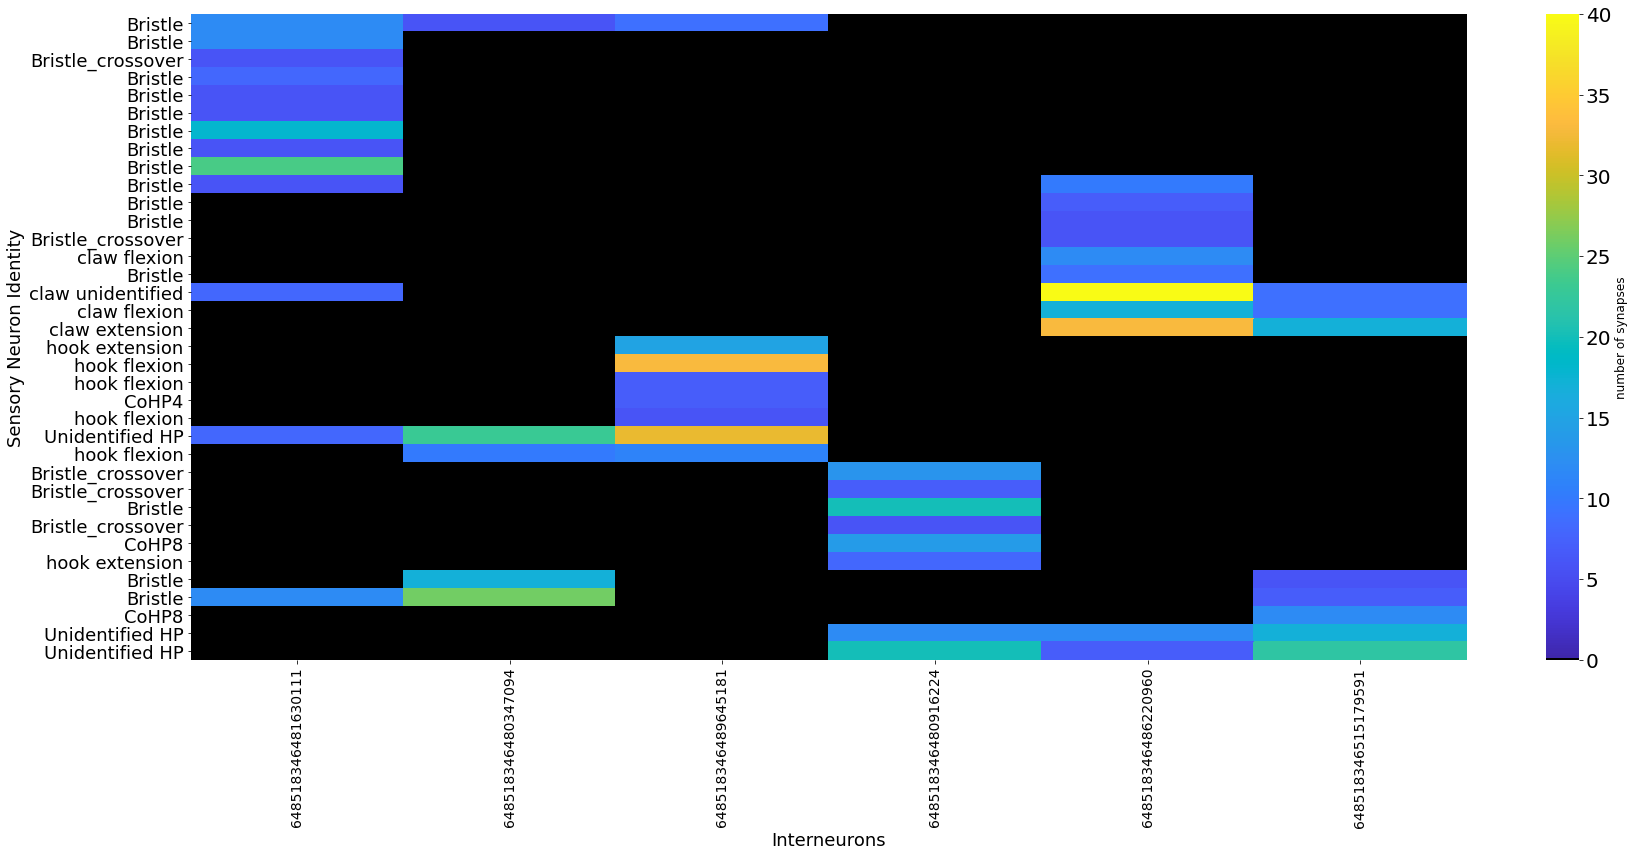

In [214]:
save_path = 'C:/Users/pratt/Desktop/Neuron_Morphology/EM_Analysis/proprioceptive_tactile_connectivity.png'
x_axis_label = 'Interneurons'
y_axis_label = 'Sensory Neuron Identity'
figure_size = [25,12]
ytick_fontsize = 18
xtick_fontsize = 14
visualize_connectivity_matrix(filtered_all_connectivity_mat, filtered_sensory_names,  filtered_int_name, x_axis_label, y_axis_label, 
                                   figure_size, ytick_fontsize, xtick_fontsize, save_path)

### Cross reference the hemilineage table

### Hemilineage interneurons

In [185]:
hm_table = client.materialize.query_table('neurotransmitter_hemilineage_table')
hm_table

,id,valid,classification_system,cell_type,pt_supervoxel_id,pt_root_id,pt_position
0,1,t,Cholinergic,1A,72696204940815199,648518346483664815,"[20040, 157696, 1601]"
1,2,t,Cholinergic,1A,74031905544403361,648518346483699887,"[59368, 120200, 1844]"
2,3,t,Cholinergic,1A,74172711618189237,648518346489340249,"[62608, 121320, 1642]"
3,4,t,Cholinergic,1A,72766573685022298,648518346479402176,"[21576, 158192, 1570]"
4,5,t,Cholinergic,1A,74031905611506958,648518346490035409,"[57520, 120032, 1945]"
...,...,...,...,...,...,...,...
307,164,t,Unsure,0B,72976375522769433,648518346476974280,"[27928, 120600, 4081]"
308,114,t,Cholinergic,23B,72694830484360189,648518346500046342,"[18592, 118752, 1511]"
309,100,t,Cholinergic,23B,72624530258178138,648518346491544894,"[17048, 120464, 1060]"
310,103,t,Cholinergic,23B,72624393020815762,648518346492790190,"[17920, 116312, 1540]"


In [202]:
hm_ids = hm_table['pt_root_id'].tolist()
hm_name = hm_table['cell_type'].values + ' - ' + hm_table['classification_system'].values 
hm_name_ids = hm_table['cell_type'].values+ ' - ' + hm_table['pt_root_id'].astype(str).tolist()
hm_name = hm_name.tolist()

In [216]:
# create connectivity matrix
hm_connectivty_mat = create_connectivity_matrix(hm_ids, df_store)
hm_connectivty_mat.shape

(160, 312)

In [217]:
# filter connectivity matrix
cell_class_threshold = 1 # 1 = connectivity from 2 cell classes, 2 = connectivty of all cell classes
filtered_hm_connectivity_mat, f_int_idxs, filt_sensory_idxs = cell_class_filter(hm_connectivty_mat, class_ids, cell_class_threshold)
filtered_int_name = np.array(hm_name_ids)[f_int_idxs].astype(str).tolist()
filtered_int_ids = np.array(hm_ids)[f_int_idxs].astype(int).tolist()
filtered_sensory_names = np.array(sensory_names)[filt_sensory_idxs].tolist()
filtered_hm_connectivity_mat.shape

(18, 5)

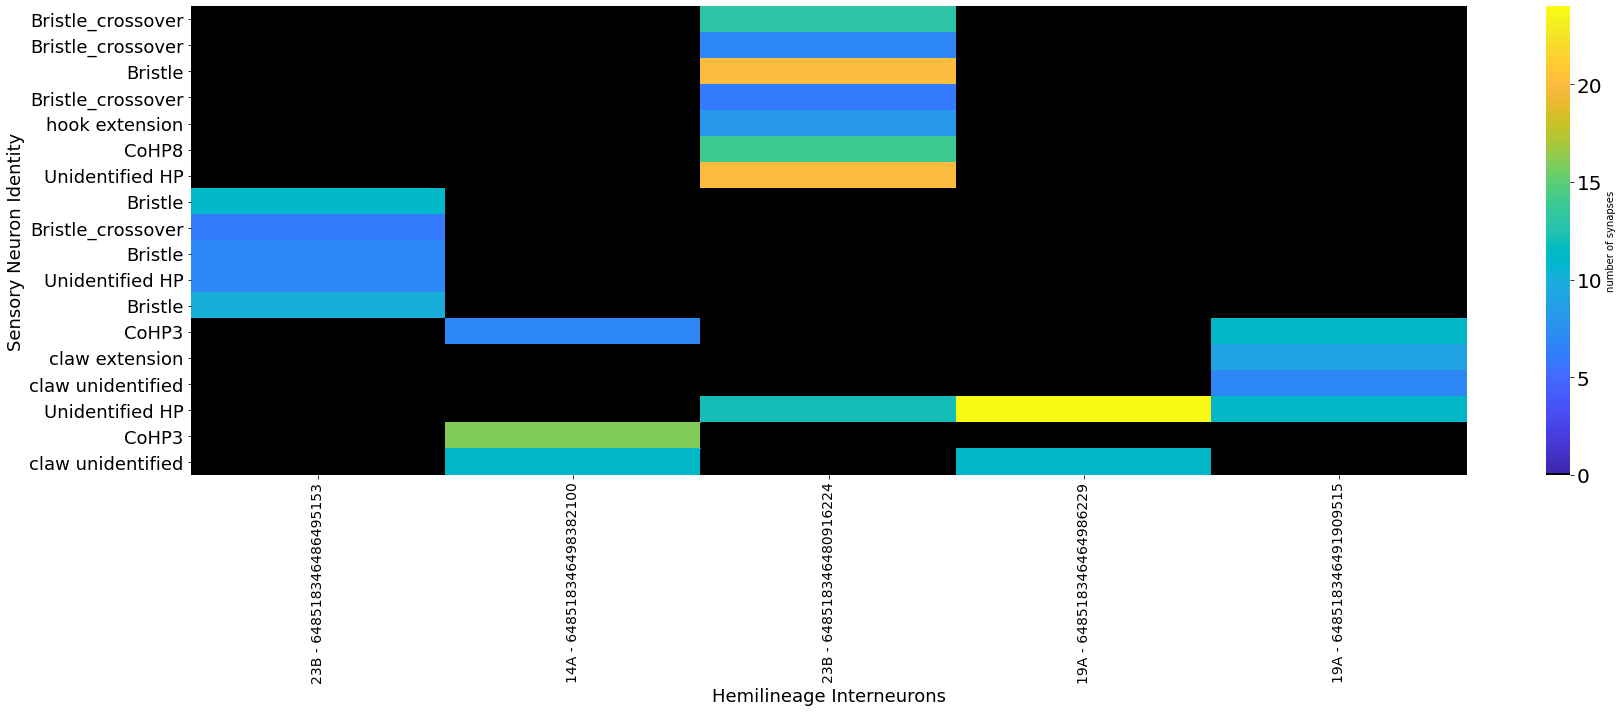

In [218]:
save_path = 'C:/Users/pratt/Desktop/Neuron_Morphology/EM_Analysis/proprioceptive_tactile_hm_connectivity.png'
x_axis_label = 'Hemilineage Interneurons'
y_axis_label = 'Sensory Neuron Identity'
figure_size = [25,10]
ytick_fontsize = 18
xtick_fontsize = 14
visualize_connectivity_matrix(filtered_hm_connectivity_mat, filtered_sensory_names,  filtered_int_name, x_axis_label, y_axis_label, 
                                   figure_size, ytick_fontsize, xtick_fontsize, save_path)

### Upstream partners

In [223]:
# find neurons downstream of proprioceptive and tactile neurons
syn_threshold = 3 # synapse threshold - Leila does 3 synapses
sensory_df = client.materialize.synapse_query(post_ids = sensory_ids) 
df_store = []
for j in sensory_ids:
    # hair plate specific data frame sorted by the strongest synapse
    int_df = sensory_df[sensory_df['post_pt_root_id'] == j]
    int_synapses = int_df.groupby(['pre_pt_root_id','post_pt_root_id'])['pre_pt_root_id'].count().reset_index(name="number_of_synapses").sort_values(by=['number_of_synapses'], ascending=False).reset_index(drop=True)
    filt_df = int_synapses[['pre_pt_root_id', "number_of_synapses"]][int_synapses['number_of_synapses'] > syn_threshold]
    
    # append this dataframe
    df_store.append(filt_df)
    

In [226]:
# find all unique downstream neurons
for j in range(len(df_store)):
    if j == 0:
        all_interneurons = df_store[j]['pre_pt_root_id'].values
    else:
        all_interneurons = np.concatenate((all_interneurons, df_store[j]['pre_pt_root_id'].values))
all_interneurons = np.unique(all_interneurons)
print('Number of Unique Upstream Interneurons = ', len(all_interneurons))

Number of Unique Upstream Interneurons =  472


In [235]:
# create connectivity matrix
def create_upstream_connectivity_matrix(int_ids, df_store):
    connectivity_mat = np.zeros((len(df_store), len(int_ids)))
    for i in range(len(int_ids)):
        for j in range(len(df_store)):
            if int_ids[i] in df_store[j]['pre_pt_root_id'].values:
                curr_ids = df_store[j]['pre_pt_root_id'].values
                connectivity_mat[j,i] = df_store[j]['number_of_synapses'][curr_ids == int_ids[i]].values[0]
#     connectivity_mat = np.transpose(connectivity_mat)
    return connectivity_mat

In [236]:
all_upstream_connectivty_mat = create_upstream_connectivity_matrix(all_interneurons, df_store)

In [237]:
all_upstream_connectivty_mat.shape

(160, 472)

In [242]:
cell_class_threshold = 1 # 1 = connectivity from 2 cell classes, 2 = connectivty of all cell classes
filtered_all_connectivity_mat, f_int_idxs, filt_sensory_idxs = cell_class_filter(all_upstream_connectivty_mat, class_ids, cell_class_threshold)
filtered_int_name = all_interneurons[f_int_idxs].astype(str).tolist()
filtered_int_ids = all_interneurons[f_int_idxs].astype(int).tolist()
filtered_sensory_names = np.array(sensory_names)[filt_sensory_idxs].tolist()
filtered_all_connectivity_mat = np.transpose(filtered_all_connectivity_mat)

In [243]:
filtered_all_connectivity_mat.shape

(19, 91)

In [254]:
def visualize_upstream_connectivity_matrix(connectivity_mat, cell_type_1_labels, cell_type_2_labels, x_axis_label, y_axis_label, figure_size, ytick_fontsize, xtick_fontsize, save_path):
    
        # cosine similarity on cell type 1
        sim_mat_1 = cosine_similarity(connectivity_mat)
        model = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(sim_mat_1)
        clustered_order_1 = plot_dendrogram(model, truncate_mode="level", p=connectivity_mat.shape[0]) # p truncate mode
        clustered_order_1 = np.array(clustered_order_1).astype(int) # convert strins into integers
#         clustered_order_1 = np.arange(0,connectivity_mat.shape[0]) # prevent reordering along the first dimension
        
        # reorder hairplate and motor neuron matrix
        reorder_mat = connectivity_mat[clustered_order_1, :]

        # Cosine similarity on cell type 2
        sim_mat_2 = cosine_similarity(np.transpose(connectivity_mat))

        # setting distance_threshold=0 ensures we compute the full tree.
        model = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(sim_mat_2)
        clustered_order_2 = plot_dendrogram(model, truncate_mode="level", p=connectivity_mat.shape[1]) # p truncate mode
        clustered_order_2 = np.array(clustered_order_2).astype(int) # convert strins into integers

        # reorder hairplate and motor neuron matrix
        reordered_mat_2 = reorder_mat[:, clustered_order_2]

        # visualize prunned matrix
        fig = plt.figure(1, figsize = figure_size)
        str_array = np.array(cell_type_1_labels)[clustered_order_1].tolist()
        int_array = []
        for i in range(len(str_array)):
            int_array.append(int(str_array[i]))
        print(int_array)
        ax = sea.heatmap(reordered_mat_2, xticklabels=np.array(cell_type_2_labels)[clustered_order_2].tolist(), yticklabels=np.array(cell_type_1_labels)[clustered_order_1].tolist(), cmap=parula_map)
        cbar = ax.collections[0].colorbar
        # here set the labelsize by 20
        cbar.ax.tick_params(labelsize=20)
        cbar.set_label(label = 'number of synapses', size=figure_size[1])
        plt.xlabel(x_axis_label, fontsize =18)
        plt.ylabel(y_axis_label, fontsize =18)
        plt.yticks(fontsize = ytick_fontsize)
        plt.xticks(fontsize = xtick_fontsize,rotation = 90)
        plt.tight_layout()
        plt.show()
        fig.savefig(save_path, dpi = 200, bbox_inches = 'tight')


[648518346498463984, 648518346464986229, 648518346491909515, 648518346497594870, 648518346521506809, 648518346493703928, 648518346483176612, 648518346484117287, 648518346494007584, 648518346475323745, 648518346517448996, 648518346491494598, 648518346496789476, 648518346489360985, 648518346490000411, 648518346496783076, 648518346500443864, 648518346474170733, 648518346493120754]


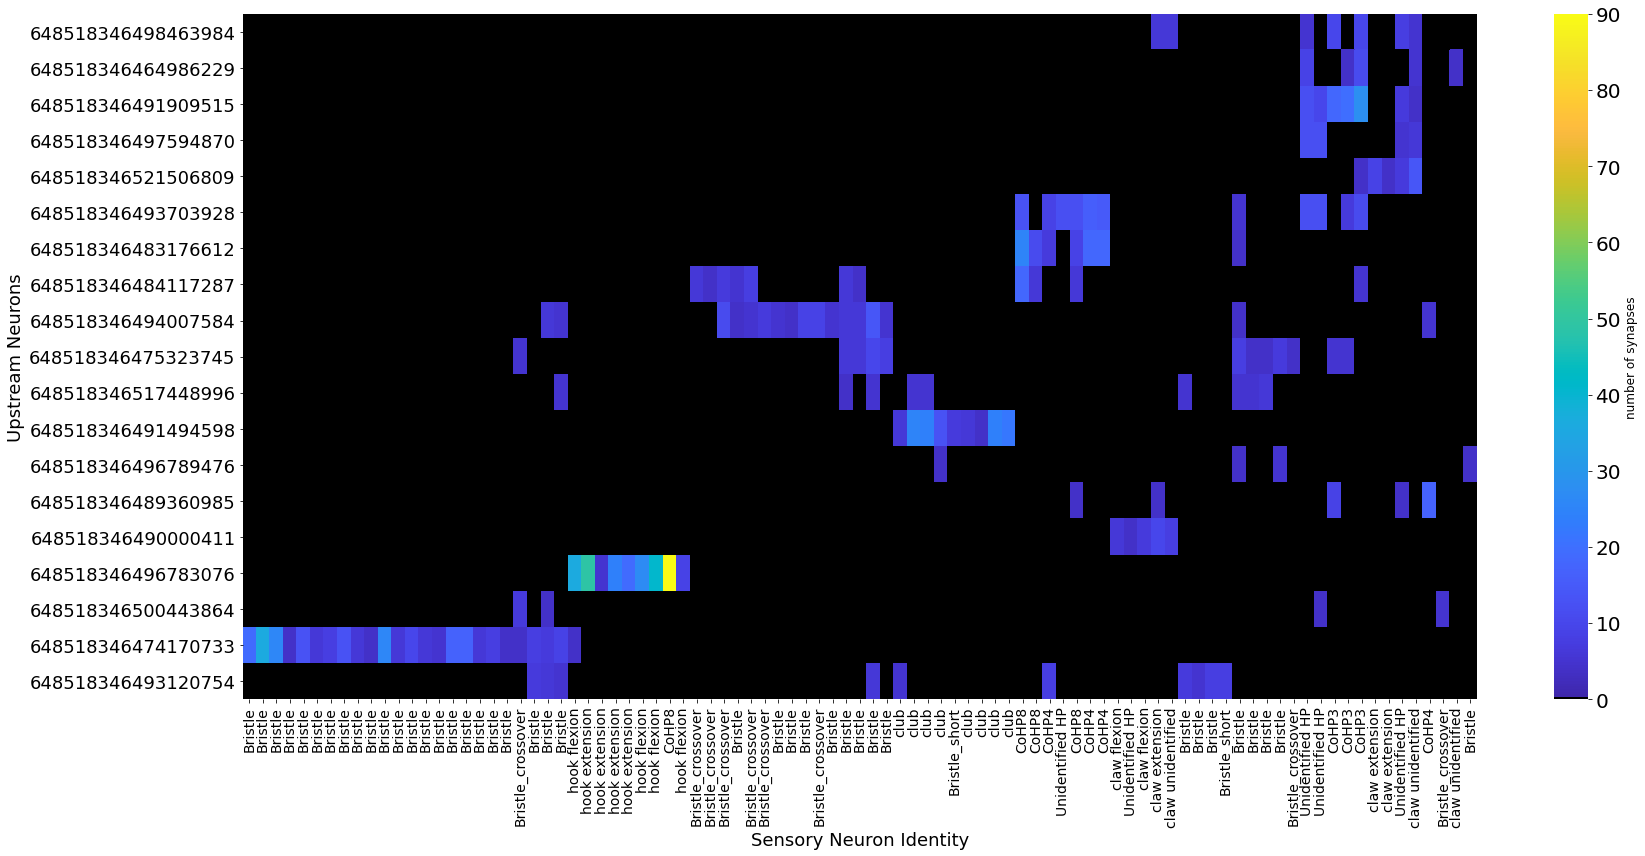

In [255]:
save_path = 'C:/Users/pratt/Desktop/Neuron_Morphology/EM_Analysis/proprioceptive_tactile_upstream_connectivity.png'
x_axis_label = 'Sensory Neuron Identity'
y_axis_label = 'Upstream Neurons'
figure_size = [25,12]
ytick_fontsize = 18
xtick_fontsize = 14
visualize_upstream_connectivity_matrix(filtered_all_connectivity_mat, filtered_int_name, filtered_sensory_names, x_axis_label, y_axis_label, 
                                   figure_size, ytick_fontsize, xtick_fontsize, save_path)